In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
user_cols = ['date', 'appname', 'API', 'status', 'counts']
data = pd.read_csv('API_Trend.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%y')
#data = pd.read_csv('API_Trend.csv',names=user_cols, header=0)
data.head()

,DATE,APPNAME,API,STATUS,COUNT
0,2023-07-04,App1,API18,F,8
1,2023-07-04,App1,API19,S,680
2,2023-07-04,App1,API19,F,87
3,2023-07-04,App10,API24,F,12
4,2023-07-04,App100,API17,S,3398


In [5]:
#if column name is a keyword or has space we use this method otherwise, use dot notation
data['APPNAME']

0          App1
1          App1
2          App1
3         App10
4        App100
          ...  
39160     App98
39161     App99
39162     App99
39163     App99
39164     App99
Name: APPNAME, Length: 39165, dtype: object

In [6]:
#dot notation
data.API

0        API18
1        API19
2        API19
3        API24
4        API17
         ...  
39160     API7
39161    API15
39162    API15
39163     API7
39164     API7
Name: API, Length: 39165, dtype: object

In [7]:
data['obid'] = data['APPNAME'] + '-' + data['API']
data.head()

,DATE,APPNAME,API,STATUS,COUNT,obid
0,2023-07-04,App1,API18,F,8,App1-API18
1,2023-07-04,App1,API19,S,680,App1-API19
2,2023-07-04,App1,API19,F,87,App1-API19
3,2023-07-04,App10,API24,F,12,App10-API24
4,2023-07-04,App100,API17,S,3398,App100-API17


In [8]:
print(data.describe())
print(data.shape)
#data.columns = data.columns.str.replace(' ', '_')

                                DATE         COUNT
count                          39165  3.916500e+04
mean   2023-08-11 07:32:01.194944512  1.921052e+05
min              2023-07-04 00:00:00  1.000000e+00
25%              2023-07-23 00:00:00  1.500000e+01
50%              2023-08-11 00:00:00  4.390000e+02
75%              2023-08-31 00:00:00  1.307800e+04
max              2023-09-19 00:00:00  1.458307e+07
std                              NaN  9.393292e+05
(39165, 6)


In [9]:
# remove column from table
data.drop('obid', axis=1, inplace=True)
#axis = 0 (which is defalut) for remove row and index id is the name of the index
#for multiple columns use list i.e  replace 'obid' with ['obid', 'API']

In [10]:
data.APPNAME.sort_values()

0         App1
20725     App1
9678      App1
14719     App1
14718     App1
         ...  
9166     App99
8648     App99
8647     App99
34699    App99
39164    App99
Name: APPNAME, Length: 39165, dtype: object

In [11]:
data.sort_values(['APPNAME','API'])

,DATE,APPNAME,API,STATUS,COUNT
0,2023-07-04,App1,API18,F,8
515,2023-07-05,App1,API18,F,9
1031,2023-07-06,App1,API18,F,5
1535,2023-07-07,App1,API18,F,18
2041,2023-07-08,App1,API18,F,17
...,...,...,...,...,...
38175,2023-09-17,App99,API7,F,5
38667,2023-09-18,App99,API7,S,1466844
38668,2023-09-18,App99,API7,F,12
39163,2023-09-19,App99,API7,S,1435970


In [12]:
booleans = []
for length in data.COUNT:
    if length >= 1000000:
        booleans.append(True)
    else:
        booleans.append(False)

is_higher = pd.Series(booleans)

#it is use to filterthe data according to condition and return the data
data[is_higher]

,DATE,APPNAME,API,STATUS,COUNT
30,2023-07-04,App106,API15,S,4292769
43,2023-07-04,App108,API17,S,2072083
90,2023-07-04,App2,API12,S,12594166
95,2023-07-04,App2,API17,S,1599232
97,2023-07-04,App2,API18,S,1355822
...,...,...,...,...,...
39022,2023-09-19,App69,API10,F,5116610
39151,2023-09-19,App98,API15,S,2445754
39159,2023-09-19,App98,API7,S,4977347
39161,2023-09-19,App99,API15,S,1449992


In [13]:
is_higher = data.COUNT >= 1000000
is_higher.head()
data[is_higher]

,DATE,APPNAME,API,STATUS,COUNT
30,2023-07-04,App106,API15,S,4292769
43,2023-07-04,App108,API17,S,2072083
90,2023-07-04,App2,API12,S,12594166
95,2023-07-04,App2,API17,S,1599232
97,2023-07-04,App2,API18,S,1355822
...,...,...,...,...,...
39022,2023-09-19,App69,API10,F,5116610
39151,2023-09-19,App98,API15,S,2445754
39159,2023-09-19,App98,API7,S,4977347
39161,2023-09-19,App99,API15,S,1449992


In [14]:
#you can directly put condition in paranthesis also

data[data.APPNAME == 'App1']

data.loc[data.APPNAME == 'App2', ['API', 'COUNT']]

,API,COUNT
90,API12,12594166
91,API12,482142
92,API12,4
93,API15,1607
94,API15,42
...,...,...
38763,API19,172299
38764,API23,85221
38765,API24,20
38766,API7,183963


In [15]:
#apply multiple filter criteria to data freames
ind_data = data[(data.APPNAME == 'App2') & (data.API == 'API12')]

# trick to filter out data with multiple arguments for or opperator
data[data.APPNAME.isin(['App1', 'App2'])]
print(ind_data)
print(ind_data.describe())


            DATE APPNAME    API STATUS     COUNT
90    2023-07-04    App2  API12      S  12594166
91    2023-07-04    App2  API12      F    482142
92    2023-07-04    App2  API12     SE         4
603   2023-07-05    App2  API12      S  12309119
604   2023-07-05    App2  API12      F    467839
...          ...     ...    ...    ...       ...
38265 2023-09-18    App2  API12      S  12700378
38266 2023-09-18    App2  API12      F   1013563
38753 2023-09-19    App2  API12      S  13402619
38754 2023-09-19    App2  API12      F   1148545
38755 2023-09-19    App2  API12     SE         2

[227 rows x 5 columns]
                                DATE         COUNT
count                            227  2.270000e+02
mean   2023-08-10 21:53:07.665198336  4.608898e+06
min              2023-07-04 00:00:00  1.000000e+00
25%              2023-07-22 12:00:00  5.000000e+00
50%              2023-08-11 00:00:00  1.401830e+05
75%              2023-08-30 12:00:00  1.273102e+07
max              2023-09-19 00:

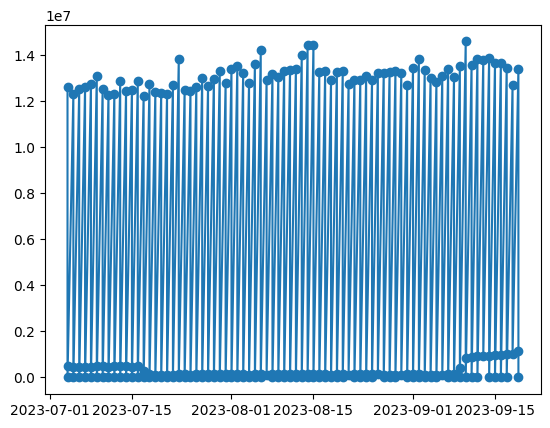

In [16]:
#plot a date vs count graph for a particular API

plt.plot(ind_data.DATE, ind_data.COUNT, marker='o')


In [17]:
print(ind_data.describe().loc['75%', 'COUNT'])

12731016.5


In [18]:
print(ind_data['COUNT'].dtype)
print(ind_data['COUNT'].isnull().sum())
non_numeric_values = ind_data['COUNT'].apply(lambda x: not isinstance(x, (int, float)))
print(non_numeric_values.sum())
zscored_count = zscore(ind_data['COUNT'])
print(zscored_count.describe())
ind_data['zsc'] = zscored_count
ind_data[ind_data.zsc > 2]


int64
0
0
count    2.270000e+02
mean     4.303948e-17
std      1.002210e+00
min     -7.480200e-01
25%     -7.480193e-01
50%     -7.252686e-01
75%      1.318213e+00
max      1.618800e+00
Name: COUNT, dtype: float64


C:\Users\Prime\AppData\Local\Temp\ipykernel_4104\3888132439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_data['zsc'] = zscored_count


,DATE,APPNAME,API,STATUS,COUNT,zsc


In [19]:
ind_data[ind_data.COUNT > ind_data.describe().loc['75%', 'COUNT']]
outlier = pd.Series([0] * ind_data.shape[0], index=ind_data.index)
outlier[((zscored_count<-4) | (zscored_count>3))] = 1
outlier

90       0
91       0
92       0
603      0
604      0
        ..
38265    0
38266    0
38753    0
38754    0
38755    0
Length: 227, dtype: int64

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

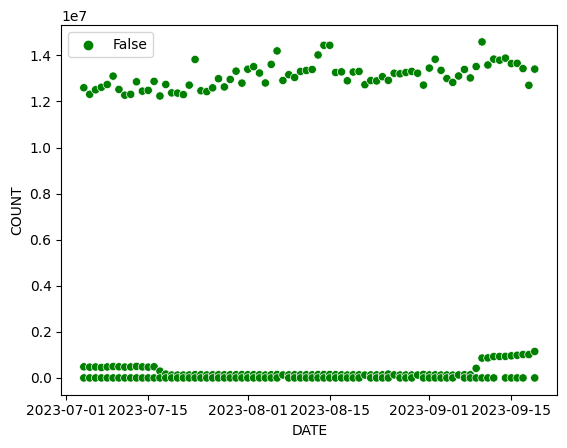

In [20]:
# Create a scatter plot using Seaborn
if not outlier.empty:
    sns.scatterplot(data=ind_data, x='DATE', y='COUNT', hue=outlier.astype(bool), palette=['green', 'red'])
else:
    sns.scatterplot(data=ind_data, x='DATE', y='COUNT', color='green')

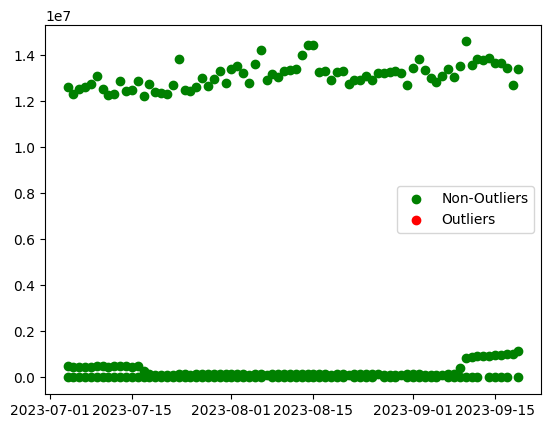

In [21]:
# Create a scatter plot for non-outliers (in green)
plt.scatter(ind_data.DATE[~outlier.astype(bool)], ind_data.COUNT[~outlier.astype(bool)], color='green', label='Non-Outliers')

# Create a scatter plot for outliers (in red)
plt.scatter(ind_data.DATE[outlier.astype(bool)], ind_data.COUNT[outlier.astype(bool)], color='red', label='Outliers')

# Add legend
plt.legend()

# Show the plot
plt.show()
